In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-07-08 11:01:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2021-07-08 11:01:21 (10.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df = df.drop(["Unnamed: 0","Unnamed: 0.1"], axis =1)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


## DATA VISUALIZATION AND PREPROCESSING

In [6]:
df["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
#installing seaborn
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



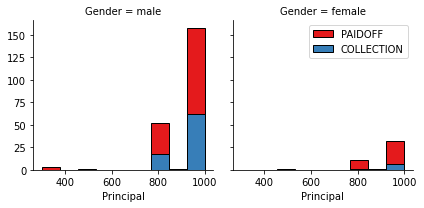

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

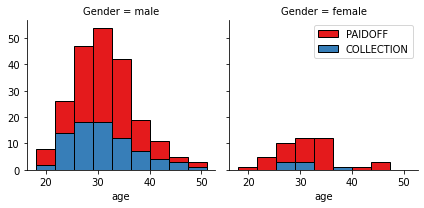

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## PRE-PROCESSING:  FEATURE SELECTION/EXTRACTION

In [10]:
df.dtypes

loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [11]:
df['effective_date'] =  pd.to_datetime(df['effective_date'], infer_datetime_format=True)

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

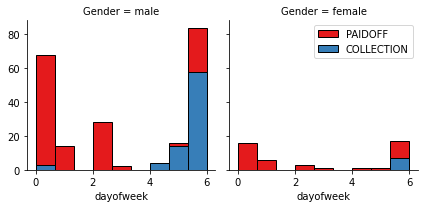

In [13]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,male,4,1


## Convert Categorical Features InTo Numerical Feature

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [16]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,male,4,1


In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,0,4,1


In [18]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,10/7/2016,45,High School or Below,0,3,0
1,0,1000,30,2016-09-08,10/7/2016,33,Bechalor,1,3,0
2,0,1000,15,2016-09-08,9/22/2016,27,college,0,3,0
3,0,1000,30,2016-09-09,10/8/2016,28,college,1,4,1
4,0,1000,30,2016-09-09,10/8/2016,29,college,0,4,1


In [19]:
df['loan_status'].dtype

dtype('int64')

## One Hot Encoding

In [20]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

In [21]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [22]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [23]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [24]:
Y_Feature = np.asarray(df['loan_status'])

In [25]:
Y = Y_Feature

In [26]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Normalize Data

In [27]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification

Now, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression



## K Nearest Neighbor(KNN)¶

Notice: You should find the best k to build the model with the best accuracy.
warning: You should not use the loan_test.csv for finding the best k, however, you can split your train_loan.csv into train and test to find the best k.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=32)
print("train_set:", X_train.shape, Y_train.shape)
print("test_set:", X_test.shape, Y_test.shape)

train_set: (276, 8) (276,)
test_set: (70, 8) (70,)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
kj=10
mean_acc = np.zeros((kj-1))
std_acc = np.zeros((kj-1))

for i in range(1,kj):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train, Y_train)
    Y_test_predict = neigh.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(Y_test, Y_test_predict)
    std_acc[i-1] = metrics.accuracy_score(Y_test, Y_test_predict)

print("MEAN_ACC:\n",mean_acc, "\nSTD_ACC\n",std_acc)

MEAN_ACC:
 [0.68571429 0.71428571 0.7        0.71428571 0.71428571 0.71428571
 0.71428571 0.72857143 0.71428571] 
STD_ACC
 [0.68571429 0.71428571 0.7        0.71428571 0.71428571 0.71428571
 0.71428571 0.72857143 0.71428571]


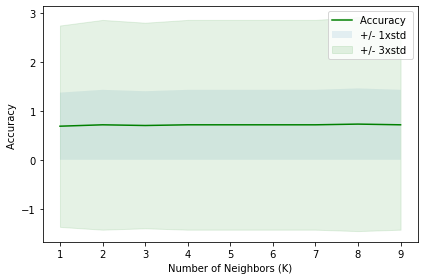

In [30]:
plt.plot(range(1,kj),mean_acc,'g')
plt.fill_between(range(1,kj),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,kj),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [31]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7285714285714285 with k= 8


In [32]:
k = 8
neigh = KNeighborsClassifier(n_neighbors = 8).fit(X_train,Y_train)
Y_test_predict = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print(" kNeighboorsTest set Accuracy: ", metrics.accuracy_score(Y_test, Y_test_predict))

Train set Accuracy:  0.8152173913043478
 kNeighboorsTest set Accuracy:  0.7285714285714285


## DECISSION TREE

In [33]:
from sklearn.tree import DecisionTreeClassifier

loantree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X,Y)
#Y_test_predict = loantree.predict(X_test)
#print("Train set Accuracy: ", metrics.accuracy_score(Y_train, loantree.predict(X_train)))
#print("DecisionTrees's Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_test_predict))

## Support Vactor Machine

In [34]:
from sklearn import svm
clf_linear = svm.SVC(kernel='linear').fit(X, Y)
#Y_test_predict = clf.predict(X_test)
#print("Train set Accuracy: ", metrics.accuracy_score(Y_train, loantree.predict(X_train)))
#print("SupportVectorMachine's Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_test_predict))

In [35]:
from sklearn import svm
clf_rbf = svm.SVC(kernel='rbf').fit(X, Y)
#Y_test_predict = clf.predict(X_test)
#print("Train set Accuracy: ", metrics.accuracy_score(Y_train, loantree.predict(X_train)))
#print("SupportVectorMachine's Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_test_predict))

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)

## Model Evaluation using Test set

In [37]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [38]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-07-08 11:01:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-07-08 11:01:40 (97.6 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [39]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [40]:
test_df = test_df.drop(["Unnamed: 0","Unnamed: 0.1"], axis =1)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [41]:
test_df.shape

(54, 8)

In [42]:
test_df['effective_date'] =  pd.to_datetime(df['effective_date'], infer_datetime_format=True)
test_df['dayofweek'] = df['effective_date'].dt.dayofweek


In [43]:
test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,10/7/2016,50,Bechalor,female,3,0
1,0,300,7,2016-09-08,9/15/2016,35,Master or Above,male,3,0
2,0,1000,30,2016-09-08,10/9/2016,43,High School or Below,female,3,0
3,0,1000,30,2016-09-09,10/9/2016,26,college,male,4,1
4,0,800,15,2016-09-09,9/25/2016,29,Bechalor,male,4,1


In [44]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [45]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              0              1.000000
High School or Below  0              0.523810
                      1              0.476190
Master or Above       0              1.000000
college               0              0.826087
                      1              0.173913
Name: loan_status, dtype: float64

In [46]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [47]:
X_test_feature= test_Feature

In [48]:

Y_test_feature=np.asarray(test_df[['loan_status']])
Y_test_feature[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [49]:
X_test_feature= preprocessing.StandardScaler().fit(X_test_feature).transform(X_test_feature.astype(float))
X_test_feature[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -4.12310563,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -4.12310563,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -4.12310563,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.24253563,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.24253563,
         2.39791576, -0.79772404, -0.86135677]])

In [50]:
# KNeighborsClasssifier Accuracy
Y_test_feature_predict = neigh.predict(X_test_feature)

f1=f1_score(Y_test_feature, Y_test_feature_predict, average='weighted') 

jaccard=jaccard_score(Y_test_feature, Y_test_feature_predict,pos_label=0)
log = log_loss(Y_test_feature, Y_test_feature_predict)

print("F1_SCORE:", f1, "\n\nJACCARD_SCORE:", jaccard, "\n\nLOG_LOSS:", log)

F1_SCORE: 0.6119162640901772 

JACCARD_SCORE: 0.7037037037037037 

LOG_LOSS: 10.233741139137614


In [51]:
# Support Vactor Machine Accuracy

Y_test_feature_predict = clf_linear.predict(X_test_feature)
f1=f1_score(Y_test_feature, Y_test_feature_predict, average='weighted') 

jaccard=jaccard_score(Y_test_feature, Y_test_feature_predict,pos_label=0)
log = log_loss(Y_test_feature, Y_test_feature_predict)

print("F1_SCORE:", f1, "\n\nJACCARD_SCORE:", jaccard, "\n\nLOG_LOSS:", log)

F1_SCORE: 0.6304176516942475 

JACCARD_SCORE: 0.7407407407407407 

LOG_LOSS: 8.954497583865733


In [52]:
# Decision Tree Classifier Accuracy

Y_test_feature_predict = loantree.predict(X_test_feature)
f1=f1_score(Y_test_feature, Y_test_feature_predict, average='weighted') 

jaccard=jaccard_score(Y_test_feature, Y_test_feature_predict,pos_label=0)
log = log_loss(Y_test_feature, Y_test_feature_predict)

print("F1_SCORE:", f1, "\n\nJACCARD_SCORE:", jaccard, "\n\nLOG_LOSS:", log)

F1_SCORE: 0.6304176516942475 

JACCARD_SCORE: 0.7407407407407407 

LOG_LOSS: 8.954497583865733


In [53]:
# Logistic Regression

Y_test_feature_predict = LR.predict(X_test_feature)
f1=f1_score(Y_test_feature, Y_test_feature_predict, average='weighted') 

jaccard=jaccard_score(Y_test_feature, Y_test_feature_predict,pos_label=0)
log = log_loss(Y_test_feature, Y_test_feature_predict)

print("F1_SCORE:", f1, "\n\nJACCARD_SCORE:", jaccard, "\n\nLOG_LOSS:", log)

F1_SCORE: 0.6304176516942475 

JACCARD_SCORE: 0.7407407407407407 

LOG_LOSS: 8.954497583865733


Report
You should be able to report the accuracy of the built model using different evaluation metrics:

           Algorithm	 Jaccard	 F1-score     LogLoss
                  KNN     0.7037	  0.6119	  10.2337
        Decision Tree	  0.7407	  0.6304	  8.9544
                   SVM	  0.7407	  0.6304      8.9544
    LogisticRegression	  0.7407	  0.6304      8.9544
